In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

from descriptors.acsf.sf_function import SymmetryFunction
plt.style.use({'figure.facecolor':'white'})

In [77]:
def plot_rdf(data, ax):
    # fig = plt.figure(figsize=(8, 6))
    center_atom = data['center_atom'].unique()[0]
    another_atom = data['another_atom'].unique()[0]

    # ax = fig.add_subplot()
    ax.set_title(f"{center_atom}-{another_atom} RDF", fontsize = 14)
    ax.set_xlabel("r(Å)", size = 10, weight = "light")
    ax.set_ylabel(f"g(r) {center_atom}-{another_atom}", size = 10, weight = "light")
    ax.set_xlim([0,15])
    x = list(map(lambda i: round(float(i),2),data.columns[4:]))

    mean = data.mean()[1:]
    std = data.std()[1:]

    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
    ax.plot(x, mean, color='red')

In [78]:
# SFプロット
def plot_sf(sf_parameters, bond, ax, save_dir=None, save_filename=None):
    r_cut_list = [];
    for param in sf_parameters:
        r_cut_list.append(param[-1])
    r_cut = max(r_cut_list)
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    # fig = plt.figure(figsize=(8,6))
    # ax = fig.add_subplot(111)
    ax.set_title(f'symmetry function parameters {bond}')
    ax.set_xlabel(f'r(Å)')
    ax.set_ylabel(f'radial symmetry function : G2')
    ax.set_xlim([0,15])
    for param in sf_parameters:
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param[0], r_ij=k, r_shift=param[1], r_cutoff=param[2]) for k in
                 r_ij], label=f'η: {param[0]} | Rs: {param[1]}')
    ax.legend()
    # fig.show()
    if save_dir is None:
        return
    # fig.savefig(f'{save_dir}/{save_filename}.png')

In [124]:
rdf_path = '/Users/y1u0d2/Desktop/Lab/result/rdf/rdf_structure_all_converge_one/'
files = glob.glob(f'{rdf_path}/*')
file = files[2]

In [125]:
df = pd.read_csv(file)
df

,structure_idx,another_atom,center_atom,structure,1.1014492753623188,1.3043478260869565,1.5072463768115942,1.710144927536232,1.9130434782608696,2.1159420289855073,...,13.072463768115943,13.27536231884058,13.478260869565219,13.681159420289855,13.884057971014494,14.08695652173913,14.28985507246377,14.492753623188406,14.695652173913045,14.898550724637682
0,0,O,Si,stishovite,0.0,0.000000,0.000000,9.323902,4.400432,0.000000,...,1.855992,0.329144,1.752110,1.785244,1.644401,1.754450,1.271877,1.661980,1.343296,1.563828
1,1,O,Si,stishovite,0.0,0.000000,0.000000,10.022068,3.703672,0.000000,...,1.788215,0.396980,1.752114,1.785271,1.646709,1.752143,1.271917,1.661911,1.343282,1.563842
2,2,O,Si,stishovite,0.0,0.000000,0.000000,10.437285,3.289176,0.000000,...,1.770072,0.417843,1.752117,1.785284,1.655974,1.742879,1.271936,1.661878,1.343275,1.563848
3,3,O,Si,stishovite,0.0,0.000000,0.000000,10.715705,3.008940,0.000000,...,1.757481,0.451558,1.747047,1.785246,1.690752,1.705851,1.278508,1.657599,1.343296,1.545718
4,4,O,Si,stishovite,0.0,0.000000,0.000000,10.849121,2.874349,0.000000,...,1.741459,0.461821,1.744432,1.782762,1.695395,1.696708,1.285166,1.655471,1.343311,1.529602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,795,O,Si,beta-quartz,0.0,0.000000,3.593464,5.666038,1.038100,0.146412,...,0.622582,0.682049,0.698141,0.805518,0.915064,0.937760,0.768420,0.660754,0.905955,0.770316
8546,796,O,Si,beta-quartz,0.0,0.000000,3.695221,5.475917,1.356517,0.000000,...,0.721309,0.647559,0.645096,0.777161,1.001908,0.856454,0.762730,0.746494,0.852680,0.762642
8547,797,O,Si,beta-quartz,0.0,0.348707,3.647122,4.410249,1.876957,0.148726,...,0.544846,0.654348,0.704308,0.847965,0.958210,0.818788,0.793188,0.739018,0.777232,0.852169
8548,798,O,Si,beta-quartz,0.0,0.385344,3.859540,5.301787,0.835035,0.146176,...,0.660469,0.654062,0.648333,0.834889,0.920548,0.843821,0.787363,0.790492,0.813264,0.783693


<ipython-input-77-3fce0435bafa>:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()[1:]
<ipython-input-77-3fce0435bafa>:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()[1:]


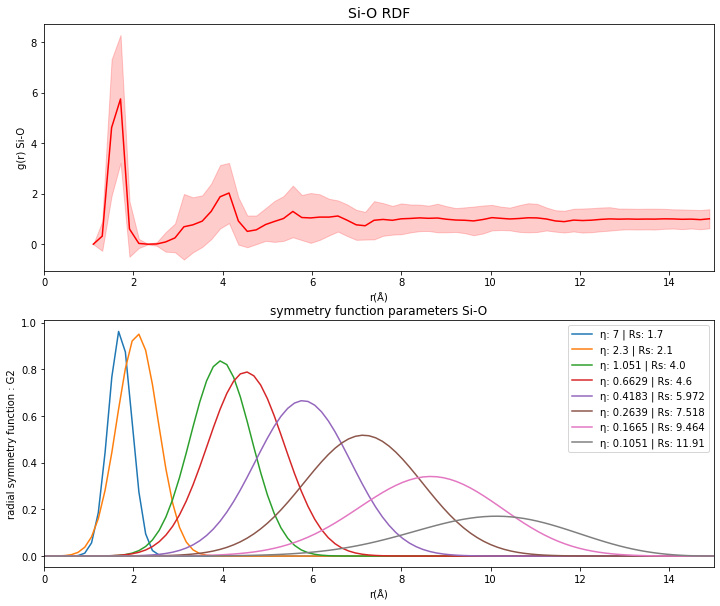

In [126]:
params_Si_Si = [[7, 2.7, 15.0], [2.3, 3.2, 15.0], [1.051, 4.5, 15.0], [0.6629, 5, 15.0], [0.4183, 6.5, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
params_O_O = [[7, 2.5, 15.0], [2.3, 2.993, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.743, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
params_O_Si = [[7, 1.7, 15.0], [2.3, 2.1, 15.0], [1.051, 4.0, 15.0], [0.6629, 4.6, 15.0], [0.4183, 5.972, 15.0], [0.2639, 7.518, 15.0], [0.1665, 9.464, 15.0], [0.1051, 11.91, 15.0]]
fig, axes= plt.subplots(2,1,figsize=(12,10))
plot_rdf(df, ax=axes[0])
plot_sf(params_O_Si,'Si-O',ax=axes[1])
fig.savefig('/Users/y1u0d2/Desktop/Lab/result/rdf/sf_O-Si.png')

In [102]:
df
mean = df.mean()[1:]

<ipython-input-102-e989bf38103b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()[1:]


In [83]:
mean


1.1014492753623188    0.000000
1.3043478260869565    0.000000
1.5072463768115942    0.000000
1.710144927536232     0.000000
1.9130434782608696    0.001244
                        ...   
14.08695652173913     1.004020
14.28985507246377     0.993452
14.492753623188406    0.982943
14.695652173913045    1.006181
14.898550724637682    0.950393
Length: 69, dtype: float64

In [131]:
for param in params_Si_Si:
    print(f'symfunction_short Si  2 Si {param[0]} {param[1]} {param[2]}')


symfunction_short Si  2 Si 7 2.7 15.0
symfunction_short Si  2 Si 2.3 3.2 15.0
symfunction_short Si  2 Si 1.051 4.5 15.0
symfunction_short Si  2 Si 0.6629 5 15.0
symfunction_short Si  2 Si 0.4183 6.5 15.0
symfunction_short Si  2 Si 0.2639 7.518 15.0
symfunction_short Si  2 Si 0.1665 9.464 15.0
symfunction_short Si  2 Si 0.1051 11.91 15.0
